In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='D')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    plt.ylim(-1,600)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [26]:
num_robot = 48
experiment_time = 1800
num_run = 100

In [27]:
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-06_robots#24_MIXED'
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-06-26_MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-07-06_robots#24_MIXED'

In [28]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-06-26_MIXED exists


In [29]:
completed_task_label = ["time", "areaID", "creation_time", "completion_time", "type", "kID_on_top", "kIDs"]

## Completed mixed areas in details (split blue and red)

In [30]:
completed_task_blue_dict = {}
completed_task_red_dict = {}

timeout = -1
respawn = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
        elif param.startswith("respawn"):
#           print(param.split("#")[-1])
            respawn = int(param.split("#")[-1])
            print("\trespawn:",respawn)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
    if respawn == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    completed_task_count_red = []
    completed_task_count_blue = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("completed_taskLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                completed_task_blue_dict[str(timeout)+","+str(respawn)] = 0
                completed_task_red_dict[str(timeout)+","+str(respawn)] = 0
                continue
#             print('\tfilename: ', filename)
            
            df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_completedTask.columns = completed_task_label
            
            completed_task_count_blue += [df_completedTask.loc[df_completedTask['type'] == 0].shape[0]]
            completed_task_count_red += [df_completedTask.loc[df_completedTask['type'] == 1].shape[0]]
            
    if(len(completed_task_count_blue)+len(completed_task_count_red)!= 100):
        print(colored("\tWARNING, completed_task_count should be 100!", 'red'))
    print(colored("\tlen(completed_task_count)"+str(len(completed_task_count_blue)+len(completed_task_count_red)), 'blue'))
    completed_task_blue_dict[str(timeout)+","+str(respawn)] = completed_task_count_blue
    completed_task_red_dict[str(timeout)+","+str(respawn)] = completed_task_count_red
    
            


Timeout folder: TimeoutRespawnMixedExp_2021-06-26_robots#48_timeout#1_respawn#10_redAreas#8_1800#seconds
	timeout: 10
	respawn: 10
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: TimeoutRespawnMixedExp_2021-06-26_robots#48_timeout#1_respawn#30_redAreas#8_1800#seconds
	timeout: 10
	respawn: 30
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: TimeoutRespawnMixedExp_2021-06-26_robots#48_timeout#1_respawn#60_redAreas#8_1800#seconds
	timeout: 10
	respawn: 60
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: TimeoutRespawnMixedExp_2021-06-26_robots#48_timeout#1_respawn#120_redAreas#8_1800#seconds
	timeout: 10
	respawn: 120
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: TimeoutRespawnMixedExp_2021-06-26_robots#48_timeout#2_respawn#10_redAreas#8_1800#seconds
	timeout: 20
	respawn: 10
	WARNING, completed_task_count should b

### Brownian

Figure name:  completedTaskMean_Mixed_brownian_TimeoutRespawnExp_2021-06-26_MIXED.png


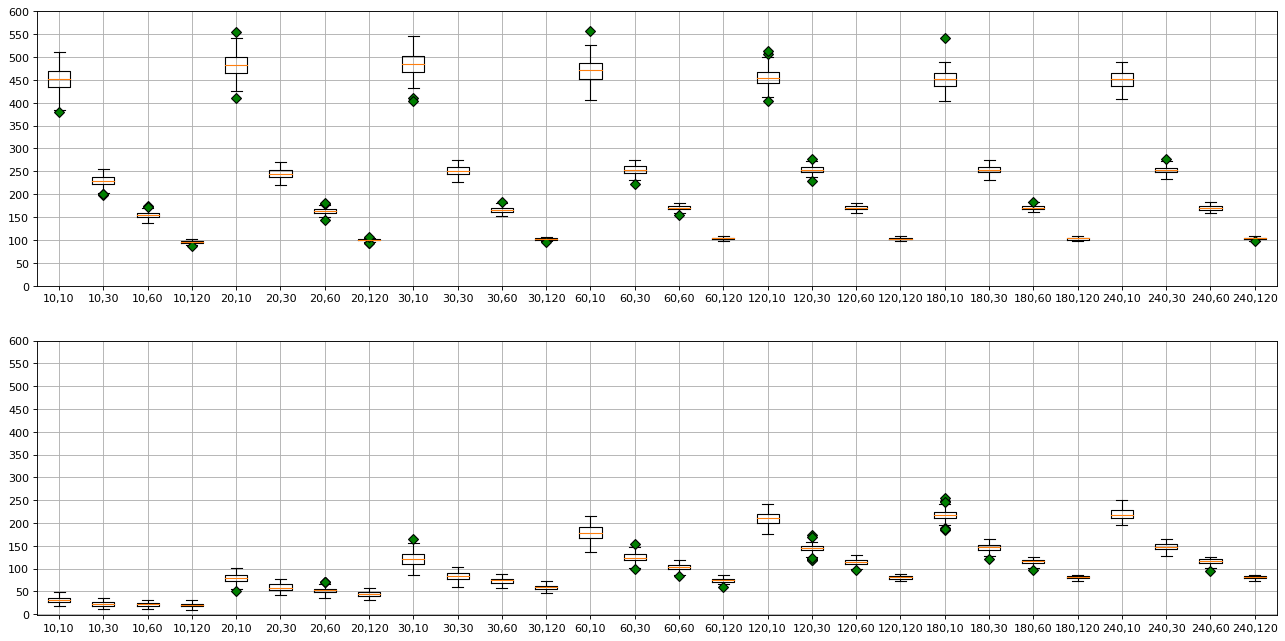

In [34]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80)
ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond)
ax2.boxplot(completed_task_red_dict.values(), flierprops=green_diamond)
ax1.set_xticklabels(completed_task_red_dict.keys())
ax2.set_xticklabels(completed_task_red_dict.keys())
ax1.grid()
ax2.grid()

ax1.set_yticks(np.arange(0,650,50)) 
ax2.set_yticks(np.arange(0,650,50)) 
# ax.set_yticklabels([1,4,5], fontsize=12)
# plt.show()

figName = "completedTaskMean_Mixed_brownian_"+results_folder.split("/")[-1]+'.png'
print("Figure name: ", figName)
plt.savefig(figName)

# fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
# ax.boxplot(my_dict.values(), flierprops=green_diamond)
# ax.set_xticklabels(my_dict.keys())
# plt.ylim(-1,600)
# plt.tight_layout()
# if save_flag:
#     plt.savefig(fig_name+'.png')

### Persistent

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80, sharey=True)
ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond)
ax2.boxplot(completed_task_red_dict.values(), flierprops=green_diamond)
ax1.set_xticklabels(completed_task_red_dict.keys())
ax2.set_xticklabels(completed_task_red_dict.keys())
ax1.grid()
ax2.grid()
# plt.show()

plt.savefig("completedTaskMean_Mixed_persistent_"+results_folder.split("/")[-1]+'.png')
# fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
# ax.boxplot(my_dict.values(), flierprops=green_diamond)
# ax.set_xticklabels(my_dict.keys())
# plt.ylim(-1,600)
# plt.tight_layout()
# if save_flag:
#     plt.savefig(fig_name+'.png')

In [16]:
np.arange(0,350,50)

array([  0,  50, 100, 150, 200, 250, 300])